In [3]:
import os

In [4]:
path = '/home/julien/Documents/Projects/boston_housing/dataset'
os.chdir(path)

In [7]:
import pandas as pd

In [18]:
df = pd.read_csv('housing_clean.csv')

In [24]:
df_clean = df.drop(columns={'Unnamed: 0'})

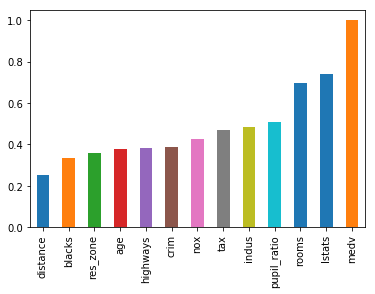

In [31]:
(df_clean
.corr()['medv']
.abs()
.sort_values()
.plot(kind='bar')
)

Seems that lstats, rooms and pupil_ratio might play a role in the medv target

In [33]:
(df_clean
.corr()
.abs()
.style.background_gradient(cmap='coolwarm')
)

,crim,res_zone,indus,nox,rooms,age,distance,highways,tax,pupil_ratio,blacks,lstats,medv
crim,1,0.200469,0.406583,0.420972,0.219247,0.352734,0.37967,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
res_zone,0.200469,1,0.533828,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.17552,0.412995,0.360445
indus,0.406583,0.533828,1,0.763651,0.391676,0.644779,0.708027,0.595129,0.72076,0.383248,0.356977,0.6038,0.483725
nox,0.420972,0.516604,0.763651,1,0.302188,0.73147,0.76923,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
rooms,0.219247,0.311991,0.391676,0.302188,1,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.69536
age,0.352734,0.569537,0.644779,0.73147,0.240265,1,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
distance,0.37967,0.664408,0.708027,0.76923,0.205246,0.747881,1,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
highways,0.625505,0.311948,0.595129,0.611441,0.209847,0.456022,0.494588,1,0.910228,0.464741,0.444413,0.488676,0.381626
tax,0.582764,0.314563,0.72076,0.668023,0.292048,0.506456,0.534432,0.910228,1,0.460853,0.441808,0.543993,0.468536
pupil_ratio,0.289946,0.391679,0.383248,0.188933,0.355501,0.261515,0.232471,0.464741,0.460853,1,0.177383,0.374044,0.507787


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e87a4d510>,
      dtype=object)

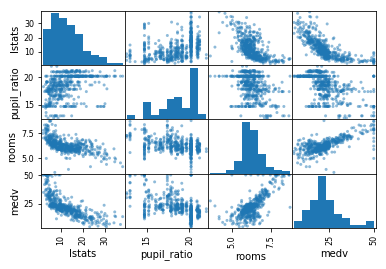

In [42]:
pd.plotting.scatter_matrix(df_clean[['lstats', 'pupil_ratio', 'rooms', 'medv']])

In [80]:
X = df_clean[[
    'lstats', 
    'pupil_ratio', 
    'rooms'
]]
y = df_clean['medv']

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.3)

In [84]:
lr = LinearRegression()

In [85]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
r2_score(y_train, lr.predict(X_train))

0.6929224353503219

In [88]:
r2_score(y_test, lr.predict(X_test))

0.6489720925778077

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression

from sklearn.model_selection import KFold, cross_val_score

In [106]:
models = {}
models['Linear Regress'] = LinearRegression()
models['Ridge Regress'] = Ridge()
models['Lasso Regress'] = Lasso()
models['Extra Trees'] = ExtraTreesRegressor()
models['AdaBoost'] = AdaBoostRegressor()
models['Random Forest'] = RandomForestRegressor()
models['Decision Tree'] = DecisionTreeRegressor()


In [117]:
seed = 42
folds = 10

model_results = []
model_name = []

for iModel in models:
    curr_model = models[iModel]
    k_folds = KFold(n_splits=folds, shuffle=False, random_state=seed)
    results = cross_val_score(estimator = curr_model,
                              X = X_train, 
                              y=y_train, 
                              #groups=None, 
                              scoring='neg_mean_squared_error', 
                              cv=k_folds)
    
    model_results.append(results)
    model_name.append(curr_model)

/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-pa

/home/julien/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 0, "[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,\n         normalize=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,\n   normalize=False, random_state=None, solver='auto', tol=0.001), Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,\n   normalize=False, positive=False, precompute=False, random_state=None,\n   selection='cyclic', tol=0.0001, warm_start=False), ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,\n          max_features='auto', max_leaf_nodes=None,\n          min_impurity_decrease=0.0, min_impurity_split=None,\n          min_samples_leaf=1, min_samples_split=2,\n          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,\n          oob_score=False, random_state=None, verbose=0, warm_start=False), AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',\n         n_estimators=50, random_state=None), RandomForestRegressor(bootstrap=True, criterion='mse', max

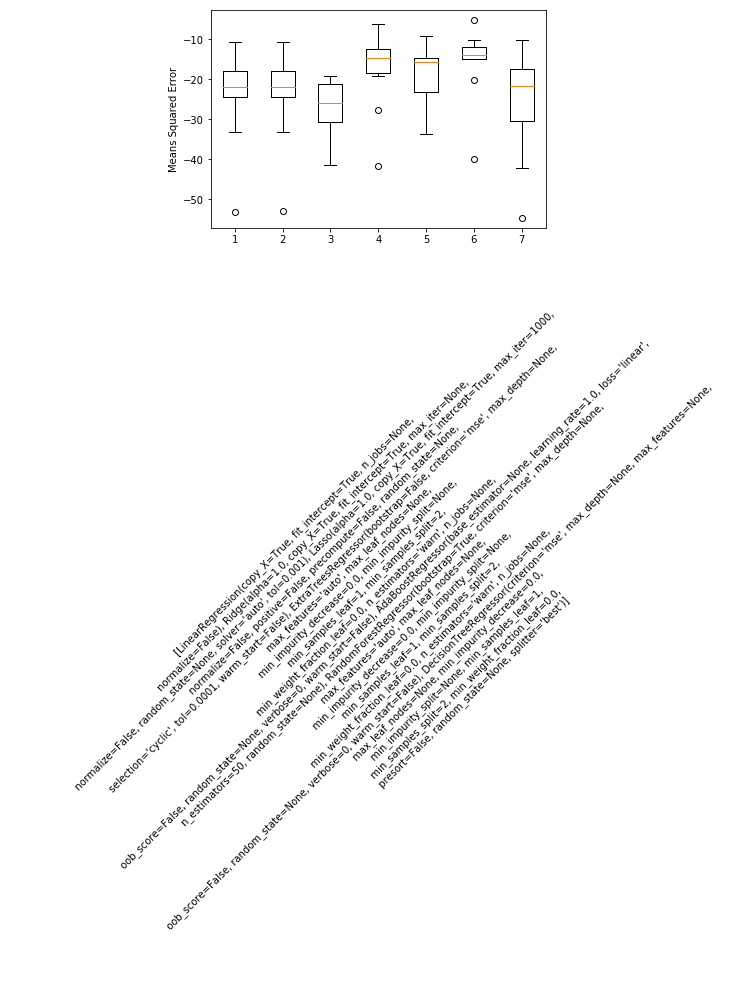

In [129]:
figure = plt.figure()
plt.boxplot(model_results);
axis = figure.add_subplot(111)
axis.set_ylabel('Means Squared Error')
axis.set_xlabel(model_name, rotation=45)

In [114]:
import matplotlib.pyplot as plt

In [130]:
model_results

[array([-53.1685242 , -24.13139704, -21.1960045 , -24.49777654,
        -21.53400537, -16.16787684, -22.11136312, -10.6568172 ,
        -16.88856333, -33.20081775]),
 array([-52.87713883, -24.15920049, -21.248303  , -24.54188991,
        -21.47513126, -16.17966302, -22.11090266, -10.74103802,
        -16.86755417, -33.24793479]),
 array([-41.48793083, -30.80903831, -26.89038186, -29.87610147,
        -23.44008518, -20.41867469, -24.99788608, -20.04552445,
        -19.13200179, -37.56785548]),
 array([-41.56162222, -27.62362222, -16.41579722, -12.73988889,
        -11.25801714, -15.98117714, -13.20304571, -12.44971143,
         -6.05025143, -19.09968286]),
 array([-33.61963549, -21.41113735, -15.33578398,  -9.12173086,
        -26.0507068 , -14.6451747 , -16.11171886, -14.8152721 ,
        -12.2966758 , -23.78302516]),
 array([-39.81056111, -14.72205278, -14.44323611, -11.57032222,
        -14.92061143, -12.56553143, -13.50390571, -10.12726286,
         -5.19729143, -20.05388   ]),
 arr